<a href="https://colab.research.google.com/github/antalvort/Mi-portfolio/blob/main/Proyectos%20Data%20Analyst/proyecto%20Sanlucar/proyecto_sanlucar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

In [12]:
uploaded=files.upload()

Saving resultados partidos.csv to resultados partidos.csv


In [13]:
import io

In [20]:
data=pd.read_csv(io.BytesIO(uploaded['resultados partidos.csv']),sep=';')

In [21]:
data.head()

,Temporada,Jornada,VS,Goles a Favor,Goles en contra,En casa,Visitante,Clasificación
0,2006,1,Nueva sevilla B,4.0,1.0,0.0,1.0,1
1,2006,2,Necropolis,6.0,2.0,1.0,0.0,1
2,2006,3,U.D.E. Abre,2.0,2.0,0.0,1.0,2
3,2006,4,Mures,5.0,2.0,1.0,0.0,2
4,2006,5,Espartinas,3.0,1.0,0.0,1.0,1


In [22]:
data=data.dropna()

In [23]:
data.isnull().sum()

,0
Temporada,0
Jornada,0
VS,0
Goles a Favor,0
Goles en contra,0
En casa,0
Visitante,0
Clasificación,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 574
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temporada        569 non-null    int64  
 1   Jornada          569 non-null    int64  
 2   VS               569 non-null    object 
 3   Goles a Favor    569 non-null    float64
 4   Goles en contra  569 non-null    float64
 5   En casa          569 non-null    float64
 6   Visitante        569 non-null    float64
 7   Clasificación    569 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 40.0+ KB


# Análisis de datos

In [26]:
goles=data[['Goles a Favor','Goles en contra']]

In [27]:
goles.sum()

,0
Goles a Favor,932.0
Goles en contra,882.0


In [28]:
goles.describe()

,Goles a Favor,Goles en contra
count,569.000000,569.000000
mean,1.637961,1.550088
std,1.567394,1.373044
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,3.000000,2.000000
max,13.000000,8.000000


In [29]:
diferencia_goles=data['Goles a Favor']-data['Goles en contra']

diferencia_goles.sum()

50.0

A lo largo de las 20 temporadas, el mayor numero de goles a favor en un partido ha sido 13 goles.
El mayor numero de goles en contra en un partido ha sido 8 goles.

El equipo marca una media de 1.64 goles por partido, y recibe 1.54. Por lo tanto marca mas que recibe aunque con un margen pequeño
la diferencia de goles ha sido de 53 goles

In [30]:
import plotly.express as px

In [31]:

fig=px.bar(data_frame=goles.sum(),color=('A favor','En contra'))

fig.update_xaxes(title='')
fig.update_yaxes(title='Número de goles')

In [32]:
goles_a_favor_en_casa=data[data['En casa']==1.0]['Goles a Favor'].sum()
goles_en_contra_en_casa=data[data['En casa']==1.0]['Goles en contra'].sum()

In [33]:
goles_en_casa=[goles_a_favor_en_casa,goles_en_contra_en_casa]
etiquetas=['Goles a favor en casa','Goles en contra en casa']

In [34]:
goles_en_casa

[541.0, 363.0]

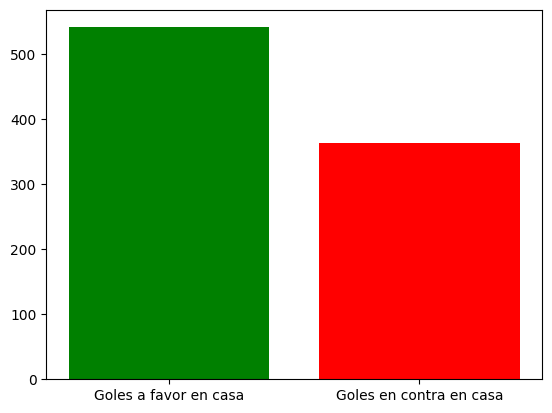

In [35]:
plt.bar(etiquetas,goles_en_casa,color=('green','red'))
plt.show()

In [36]:
goles_a_favor_fuera=data[data['Visitante']==1.0]['Goles a Favor'].sum()
goles_en_contra_fuera=data[data['Visitante']==1.0]['Goles en contra'].sum()
goles_fuera=[goles_a_favor_fuera,goles_en_contra_fuera]
etiquetas_fuera=['goles_a_favor_fuera','goles_en_contra_fuera']

<BarContainer object of 2 artists>

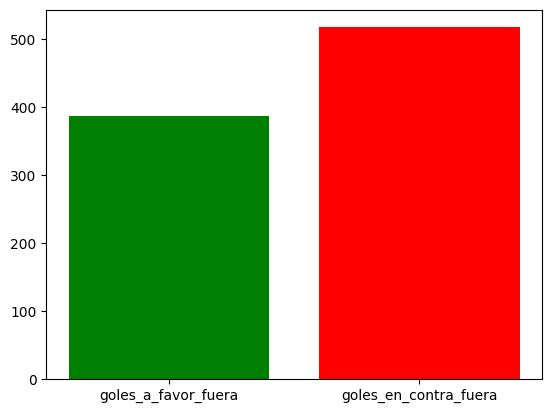

In [37]:
plt.bar(etiquetas_fuera,goles_fuera,color=('green','red'))

In [38]:
print(f'el numero de goles en casa fueron {goles_a_favor_en_casa} a favor y {goles_en_contra_en_casa} en contra ')
print(f'el numero de goles fuera se establece en {goles_a_favor_fuera} a favor y {goles_en_contra_fuera} en contra ')

el numero de goles en casa fueron 541.0 a favor y 363.0 en contra 
el numero de goles fuera se establece en 387.0 a favor y 517.0 en contra 


In [39]:
media_goles_en_contra_visitante=data[data['Visitante']==1.0]['Goles en contra'].mean()
media_goles_en_contra_local=data[data['En casa']==1.0]['Goles en contra'].mean()
print(f'La media de goles en contra como local es {round(media_goles_en_contra_local,2)} y {round(media_goles_en_contra_visitante,2)} como visitante ')

La media de goles en contra como local es 1.26 y 1.85 como visitante 


In [40]:
partidos_ganados=data[data['Goles a Favor']>data['Goles en contra']].shape[0]
partidos_perdidos=data[data['Goles a Favor']<data['Goles en contra']].shape[0]
partidos_empatados=data[data['Goles a Favor']==data['Goles en contra']].shape[0]

In [41]:
print(f'El numero de partidos ganados es {partidos_ganados}')
print(f'el numero de partidos empatados es {partidos_empatados}')
print(f'el numero de partidos perdidos es {partidos_perdidos}')

El numero de partidos ganados es 218
el numero de partidos empatados es 119
el numero de partidos perdidos es 232


<BarContainer object of 3 artists>

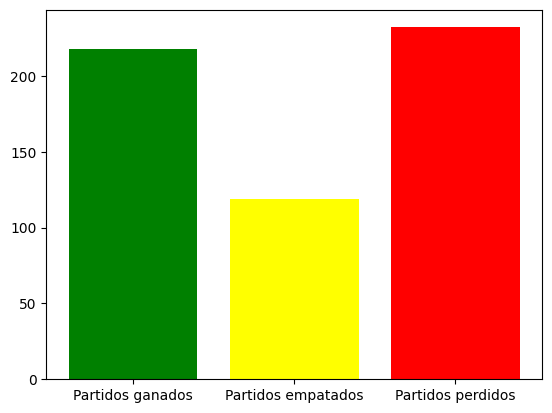

In [42]:
vic_emp_derr=[partidos_ganados,partidos_empatados,partidos_perdidos]
etiquetas_vic_derr=['Partidos ganados','Partidos empatados','Partidos perdidos']
plt.bar(etiquetas_vic_derr,vic_emp_derr,color=('green','yellow','red'))

In [43]:
puntos_conseguidos=(partidos_ganados) *3 + partidos_empatados
puntos_perdidos=partidos_perdidos*3
diferencia_puntos=puntos_conseguidos - puntos_perdidos
print(f'El numero de puntos conseguidos es {puntos_conseguidos}, ha perdido {puntos_perdidos}. La diferencia de puntos es {diferencia_puntos}' )

El numero de puntos conseguidos es 773, ha perdido 696. La diferencia de puntos es 77


In [44]:
partidos_ganados_casa=data[(data['Goles a Favor']>data['Goles en contra']) & (data['En casa']==1.0)].shape[0]
partidos_ganados_fuera=data[(data['Goles a Favor']>data['Goles en contra']) & (data['Visitante']==1.0)].shape[0]
print(f'A lo largo de estos 20 años ha ganado {partidos_ganados_casa} partidos en casa y {partidos_ganados_fuera} fuera')

A lo largo de estos 20 años ha ganado 144 partidos en casa y 73 fuera


In [45]:
partidos_perdidos_casa=data[(data['Goles a Favor']<data['Goles en contra']) & (data['En casa']==1.0)].shape[0]
partidos_perdidos_fuera=data[(data['Goles a Favor']<data['Goles en contra']) & (data['Visitante']==1.0)].shape[0]
print(f'A lo largo de estos 20 años ha perdido {partidos_perdidos_casa} partidos en casa y {partidos_perdidos_fuera} fuera')

A lo largo de estos 20 años ha perdido 85 partidos en casa y 147 fuera


In [46]:
porcentaje_victorias_casa=(partidos_ganados_casa*100)/partidos_ganados

porcentaje_victorias_fuera=(partidos_ganados_fuera*100)/partidos_ganados
print(f'El porcentaje de victorias en casa es del {round(porcentaje_victorias_casa,2)}%')
print(f'El porcentaje de victorias a domicilio es del {round(porcentaje_victorias_fuera,2)}%')


El porcentaje de victorias en casa es del 66.06%
El porcentaje de victorias a domicilio es del 33.49%


In [47]:
porcentaje_victorias=[porcentaje_victorias_casa,porcentaje_victorias_fuera]
etiquetas_tarta1=['porcentaje victorias local','porcentaje victorias visitante']
px.pie(values=porcentaje_victorias,names=etiquetas_tarta1,title='Porcentaje de victorias')

In [48]:
porcentaje_derrotas_casa=(partidos_perdidos_casa*100)/partidos_perdidos

porcentaje_derrotas_fuera=(partidos_perdidos_fuera*100)/partidos_perdidos
print(f'El porcentaje de derrotas en casa es del {round(porcentaje_derrotas_casa,2)}%')
print(f'El porcentaje de derrotas a domicilio es del {round(porcentaje_derrotas_fuera,2)}%')

El porcentaje de derrotas en casa es del 36.64%
El porcentaje de derrotas a domicilio es del 63.36%


In [49]:
porcentaje_derrotas=[porcentaje_derrotas_casa,porcentaje_derrotas_fuera]
etiquetas_tarta2=['porcentaje_derrotas_casa','porcentaje_derrotas_fuera']
px.pie(data,values=porcentaje_derrotas,names=etiquetas_tarta2,title='Porcentaje_derrotas')


In [50]:
resultados_mas_repetidos=data[['Goles a Favor','Goles en contra']].value_counts().head()

In [51]:
resultados_mas_repetidos=pd.DataFrame(resultados_mas_repetidos)
resultados_mas_repetidos=resultados_mas_repetidos.reset_index()

resultados_mas_repetidos

,Goles a Favor,Goles en contra,count
0,0.0,1.0,55
1,1.0,1.0,51
2,1.0,2.0,39
3,0.0,0.0,33
4,2.0,1.0,31
